<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/agapi_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AtomGPT.org API (AGAPI) Client

https://github.com/atomgptlab/agapi

References to cite:

1. https://doi.org/10.1016/j.commatsci.2025.114063
2. https://doi.org/10.1007/s40192-025-00410-9

# Table of contents

1. Get your AtomGPT.org API key
2. General question-answer
3. Query JARVIS-DFT entries for a formula
4. JARVIS-DFT by element search
5. Get ALIGNN Predictions
6. Use ALIGNN-FF to relax atomic structure
7. Protein folding with ESM fold
8. XRD Pattern to atomic structure

Author: Kamal Choudhary (kchoudh2@jhu.edu)

Do you have any suggestions/requests for other tools? Raise a GitHub [issue](https://github.com/atomgptlab/agapi/issues/new)

If you like this project, don't forget to give a GitHub [star](https://github.com/atomgptlab/agapi/stargazers) and cite papers above

In [1]:
!pip install -q git+https://github.com/atomgptlab/agapi.git@develop jarvis-tools

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 28.5 MB/s eta 0:00:00


## Get your AtomGPT API Key



Go to Website: https://atomgpt.org/

Navigate to Profile >> Settings >> Account >> API Keys >> Show/Create

It will look like sk-xxxxxxxxxxxxx paste below

In [2]:
api_key = "sk-"

In [3]:
from agapi.agents import AGAPIAgent
agent = AGAPIAgent(api_key=api_key)


In [4]:
ag1=agent.query_sync("Whats the capital of US?",render_html=True)

In [5]:
# With tools Turned on, by default true
ag2=agent.query_sync("Find all Al2O3 materials",render_html=True)

#,JID,Formula,Space‑group (symbol),Formation energy / atom (eV),Bulk modulus (GPa),Bandgap (MBJ) (eV),Bandgap (OptB88vdW) (eV),ΔE hull (eV)
1,JVASP‑32,Al₂O₃,R‑3c,‑3.31332,241.28,7.571,6.43,0.00
2,JVASP‑49866,Al₂O₃,R‑3,‑3.23234,202.07,7.487,6.187,0.081
3,JVASP‑50058,Al₂O₃,P‑31c,‑3.22476,200.13,7.302,6.011,0.088
4,JVASP‑57670,Al₂O₃,Pbcn,‑3.22201,240.82,7.006,5.89,0.091
5,JVASP‑49931,Al₂O₃,C2/m,‑3.28282,186.64,6.343,4.851,0.031
6,JVASP‑10076,Al₂O₃,C2/m,‑3.29678,194.04,6.23,4.944,0.017
7,JVASP‑49837,Al₂O₃,P2₁/c,‑3.20783,125.30,6.341,4.737,0.106
8,JVASP‑50026,Al₂O₃,P2₁/c,‑3.22873,189.91,6.038,4.616,0.085
9,JVASP‑49795,Al₂O₃,Cmc2₁,‑3.20812,87.71,6.212,4.396,0.105
10,JVASP‑96735,Al₂O₃,C2/c,‑3.12509,-,6.54,4.945,0.188


In [6]:
# With tools Turned off
ag2=agent.query_sync("Find all Al2O3 materials",render_html=True, use_tools=False)

In [ ]:
ag3=agent.query_sync("Show me all MgB2 polymorphs",render_html=True)

#,JARVIS‑ID,Space‑group (symbol),Formation energy / atom (eV),Bulk modulus (GPa),Bandgap (eV),Notes
1,JVASP‑19821,P6/mmm,‑0.19412,155.42,0.0 (electronic metal),"Ground‑state, most stable"
2,JVASP‑1151,P6/mmm,‑0.19412,155.42,0.0,"Duplicate of #1 (same structure, same energy)"
3,JVASP‑135405,P6/mmm,+1.19468,not reported,0.0,Metastable/high‑energy configuration (likely a different atomic arrangement or a strained variant)


In [ ]:
ag4=agent.query_sync("Get POSCAR for JVASP-1002",render_html=True)

In [11]:
ag5=agent.query_sync("How many materials have Tc_supercon data?",render_html=True)

In [14]:
ag5=agent.query_sync("What’s the Tc_Supercon for MgB2 and whats the JARVIS-ID for it?",render_html=True)

JARVIS‑ID,Formula,Space‑group,Tc (K),Source
JVASP‑19821,MgB₂,P6/mmm,32.69 K,JARVIS‑DFT database (Tc_Supercon property)
JVASP‑1151,MgB₂,P6/mmm,32.69 K,Same as above (duplicate entry)


In [20]:
ag5=agent.query_sync("What’s the Tc_Supercon for NbC in K?",render_html=True)

JARVIS ID,Formula,Space group,Tc (K)
JVASP‑19889,NbC,Fm‑3m (rock‑salt),17.16 K


In [23]:
ag5=agent.query_sync("What’s the Tc_Supercon for NbO in K?",render_html=True)

JARVIS‑ID,Crystal structure,Tc (K),Source
JVASP‑93368,Pm‑3m (cubic),4.10 K,JARVIS‑DFT database (property Tc_supercon)
JVASP‑14492,Pm‑3m (cubic),3.59 K,JARVIS‑DFT database (property Tc_supercon)


In [29]:
ag5=agent.query_sync("What’s the Tc_Supercon for most stable Al in K in JARVIS-DFT database?",render_html=True)

JARVIS‑ID,Formula,Space group,Formation energy / atom (eV),Tc (Supercon) (K)
JVASP‑816,Al,Fm‑3m,-0.0 eV,1.60 K
JVASP‑14615,Al,Fm‑3m,-0.0 eV,- (no data)


In [16]:
ag5=agent.query_sync("What’s the solar cell SLME for CH3NH3PbI3 and whats the JARVIS-ID for it?",render_html=True)

In [ ]:
ag5=agent.query_sync("What’s the stiffest Si,O material?",render_html=True)

Material,Formula,Space‑group,Bulk modulus (GPa),Source
Silicon dioxide (quartz),SiO₂,Pa‑3,320.2 GPa,JARVIS‑DFT (bulk modulus from DFT calculations)


In [ ]:
ag6=agent.query_sync("What are the bulk moduli of Sc, Ti, V, also show their JARVIS-IDs?",render_html=True)

Element,JARVIS‑ID,Crystal structure (space‑group),Bulk modulus (GPa)
Sc,JVASP‑14810,P6₃/mmc (hexagonal),55.8
Ti,JVASP‑14815,P6/mmm (hexagonal),115.2
V,JVASP‑14837,Im‑3m (cubic),183.4


In [ ]:
ag7=agent.query_sync("What are the formation energies of Ni3Al, CuNi, Fe3O4?",render_html=True)

Material,JARVIS‑ID,Formation energy (eV / atom),Space group,Notes
Ni₃Al,JVASP‑126270,‑0.447 eV,Pm‑3m,Lowest‑energy cubic phase (fcc‑based).
CuNi,JVASP‑100409,+0.007 eV,R‑3m,"Slightly positive, indicating a weakly unstable alloy relative to the elemental reference."
Fe₃O₄,JVASP‑144718,‑1.355 eV,Fd‑3m,Most stable inverse‑spinel form.


In [ ]:
ag8=agent.query_sync("What are the bandgaps of GaN, AlN, InN?",render_html=True)

In [ ]:
# ag10=agent.query_sync("Find all materials with bandgap between 2 and 3 eV",render_html=True)

In [ ]:
ag9=agent.query_sync("Find materials with bulk modulus > 200 GPa",render_html=True)

#,JID,Formula,Space‑group,Bulk Modulus (GPa),Bandgap (eV),Bandgap source,Formation E/atom (eV),ΔE hull (eV)
1,JVASP‑42657,FeO₂,P4₂/mnm,269.79,0.00,MBJ,-1.392,0.028
2,JVASP‑22644,SiC,P3m1,213.29,3.02,MBJ,-0.244,0.0004
3,JVASP‑37194,Mn₂SiRu,F‑43m,234.57,0.00,MBJ,-0.282,0.0082
4,JVASP‑37044,TiFe₂As,Fm‑3m,202.93,0.00,MBJ,-0.333,0.1586
5,JVASP‑16080,Mn,Fm‑3m,281.13,0.00,OptB88vdW,0.076,0.000
6,JVASP‑14830,W,Im‑3m,305.20,0.00,MBJ,0.000,0.000
7,JVASP‑37583,VFeRu₂,Fm‑3m,234.77,0.00,MBJ,-0.074,0.0507
8,JVASP‑91700,B₂CN,Pmma,330.32,4.55,MBJ,-0.531,0.1926
9,JVASP‑16084,Tc,Fm‑3m,299.20,0.00,MBJ,0.072,0.000
10,JVASP‑85370,AlPO₄,Cmmm,264.47,4.55,MBJ,-2.500,0.2788


In [ ]:
ag10=agent.query_sync("Compare the bulk moduli and formation energies of TiC, ZrC, HfC",render_html=True)

Material,JARVIS‑ID,Bulk modulus (GPa),Formation energy per atom (eV / atom)
TiC,JVASP‑18916,255.3,‑0.91993
ZrC,JVASP‑15060,224.37,‑0.96724
HfC,JVASP‑17957,245.8,‑1.05051
Property,TiC,ZrC,HfC
Bulk modulus,Highest (≈ 255 GPa),Lowest (≈ 224 GPa),Intermediate (≈ 246 GPa)
Formation energy,Slightly less stable than ZrC/HfC,Most stable among the three (≈ ‑0.97 eV / atom),Most stable (≈ ‑1.05 eV / atom)


In [ ]:
# ag13=agent.query_sync("What are the most stable polymorphs of MgB2, AlB2, TiB2?",render_html=True)

In [ ]:
ag11=agent.query_sync("Compare bandgaps across BN, AlN, GaN, InN",render_html=True)

Material,Most stable polymorph (lowest Eₕᵤₗ / atom),MBJ band‑gap (eV),OptB88‑vdW band‑gap (eV)
BN,P6₃/mmc (hexagonal wurtzite‑like) - Eₕᵤₗ ≈ -1.384 eV / atom,6.11 eV,4.44 eV
AlN,Fm‑3m (rock‑salt) - Eₕᵤₗ ≈ -1.463 eV / atom,5.70 eV,4.89 eV
GaN,P6₃/mmc (wurtzite) - Eₕᵤₗ ≈ -0.139 eV / atom,2.32 eV,1.16 eV
InN,P6₃mc (wurtzite) - Eₕᵤₗ ≈ 0.009 eV / atom,0.76 eV,0.00 eV


In [ ]:
ag12=agent.query_sync("What are the formation energies of SiC, AlN, MgO?",render_html=True)

Material,Polymorph (space‑group),JARVIS‑ID,Formation energy (eV / atom),Notes
SiC,P3m1 (hexagonal),JVASP‑22644,‑0.2438,Lowest‑energy structure; 13 polymorphs in the database.
,P6₃mc (wurtzite),JVASP‑107,‑0.2434,Very close in energy (Δ≈0.0004 eV).
,F‑43m (rock‑salt),JVASP‑8158,‑0.2442,Slightly lower than wurtzite but still >‑0.24 eV.
,…,…,…,"Other polymorphs (Fm‑3m, P4/mmm, etc.) have higher energies (≥‑0.24 eV)."
AlN,P6₃mc (wurtzite),JVASP‑39,‑1.6495,Most stable; 6 polymorphs in the database.
,P6₃/mmc (hexagonal),JVASP‑4849,‑1.5226,Slightly higher (Δ≈0.127 eV).
,F‑43m (rock‑salt),JVASP‑7844,‑1.6291,Δ≈0.020 eV above wurtzite.
,…,…,…,"Other phases (Fm‑3m, I4/mmm, P‑6m2) are higher in energy."
MgO,Fm‑3m (rock‑salt),JVASP‑116,‑3.0048,Lowest‑energy structure; 14 polymorphs in the database.
,P6₃mc (hexagonal),JVASP‑43629,‑2.8907,Δ≈0.114 eV higher.


In [ ]:
ag13=agent.query_sync("Compare properties of Si, SiC, SiGe",render_html=True)

In [ ]:
ag14=agent.query_sync("Among materials with bulk modulus > 150 GPa, which has the lowest ehull?",render_html=True)

JID,Formula,Bulk modulus (GPa),ehull (eV/atom),Notes
JVASP‑14873,SrB₆,150.6,0.00,Stable (ehull = 0)
JVASP‑15345,YCoC₂,179.2,0.00,Stable
JVASP‑65020,BeCuPt,166.9,0.00,Stable
JVASP‑14575,CeN,165.6,0.00,Stable
JVASP‑16080,Mn,281.1,0.00,Stable
JVASP‑14830,W,305.2,0.00,Stable


In [ ]:
ag15=agent.query_sync("Among Si,O materials, find those with bandgap > 3 eV",render_html=True)

#,JARVIS‑ID,Formula,Space‑group,MBJ bandgap (eV),OptB88vdW bandgap (eV),Formation energy / atom (eV),Notes
1,JVASP‑22571,SiO₂,Pna2₁,8.43,5.83,-2.8827,Stable α‑quartz‑like phase
2,JVASP‑28392,SiO₂,Pn‑3m,6.24,5.12,-2.5986,Cubic β‑cristobalite
3,JVASP‑4516,SiO₂,P4₃2₁₂,8.19,5.74,-2.8855,Tetragonal polymorph
4,JVASP‑22572,SiO₂,I‑4,8.66,5.74,-2.8686,Body‑centered tetragonal
5,JVASP‑22575,SiO₂,Ama2,8.53,5.75,-2.8781,Orthorhombic
6,JVASP‑7633,SiO₂,Fm‑3m,3.21,2.21,-1.6947,Cubic α‑quartz‑like (high‑T)
7,JVASP‑22611,SiO₂,P6₃22,8.51,5.54,-2.8686,Hexagonal
8,JVASP‑22578,SiO₂,Cc,8.40,5.70,-2.8783,Monoclinic
9,JVASP‑8150,SiO₂,Ibam,6.81,4.90,-2.4656,Orthorhombic
10,JVASP‑54225,SiO₂,P‑4m2,9.09,5.45,-2.8261,Tetragonal


In [ ]:
ag16=agent.query_sync("For TiO2, which polymorph is stiffest?",render_html=True)

Polymorph (space‑group),Bulk modulus (B) (GPa),Source
P‑62m (TiO₂‑III),283.9,JARVIS‑DFT (JVASP‑90247)
Fm‑3m (TiO₂‑IV),254.1,JVASP‑36222
Pa‑3 (TiO₂‑V),253.1,JVASP‑152565
P4₂/mnm (rutile),226.3,JVASP‑5 (and 226.3 in JVASP‑10036)
Pbcn (TiO₂‑II),216.1,JVASP‑9094
P2₁/c (TiO₂‑VI),195.6,JVASP‑9154
I4₁/amd (anatase),196.6,JVASP‑104 (and 196.1 in JVASP‑314)
Pbca (TiO₂‑VII),205.1,JVASP‑18983
C2/m (TiO₂‑VIII),189.1,JVASP‑22573
…,-,-


In [ ]:
ag17=agent.query_sync("What is the crystal structure of the most stable GaN?",render_html=True)

In [ ]:
ag18=agent.query_sync("Show me the POSCAR for the most stable ZnO",render_html=True)

In [ ]:
ag19=agent.query_sync("Find materials with Tc supercon > 10 K",render_html=True)

Rank,JARVIS‑ID,Formula,Space‑group,Tc (K),Bandgap (eV),Notes
1,JVASP‑16080,Mn,Fm‑3m,22.90,0.0,Simple cubic Mn - high‑Tc prediction
2,JVASP‑15086,ScN,Fm‑3m,20.78,0.736 (MBJ),"Narrow‑gap semiconductor, predicted Tc high"
3,JVASP‑17334,MnN,Pmm2,20.58,0.0,"Mn-N alloy, metallic"
4,JVASP‑91700,B₂CN,Pmma,19.41,0.0,"B-C-N ternary, metallic"
5,JVASP‑14837,V,Im‑3m,18.26,0.0,Body‑centered cubic V
6,JVASP‑14960,V₃Si,Pm‑3n,17.63,0.0,A15‑type V₃Si
7,JVASP‑19889,NbC,Fm‑3m,17.16,0.0,Rock‑salt NbC
8,JVASP‑18923,NbS,P6₃/mmc,17.02,0.0,Hexagonal NbS
9,JVASP‑91617,V₃Ge,Pm‑3n,15.42,0.0,A15‑type V₃Ge
10,JVASP‑20073,TaC,Fm‑3m,15.23,0.0,Rock‑salt TaC


In [ ]:
ag20=agent.query_sync("What is the magnetic moment of NiFe2O4?",render_html=True)

Source,Value,Notes
JARVIS‑DFT database,Not reported,The JARVIS‑DFT entry for Fe₂NiO₄ (the same composition) does not include a magnetic‑moment field in the standard output.
Literature (experimental),≈ 2 µB f.u.,"NiFe₂O₄ is a ferrimagnetic spinel. In the normal spinel structure Ni²⁺ occupies octahedral sites (S = 1) and Fe³⁺ occupies both tetrahedral (S = 5/2) and octahedral (S = 5/2) sites. The antiparallel alignment of the tetrahedral and octahedral sub‑lattices leaves a net moment of ~2 µB per formula unit at room temperature. (See e.g., J. Appl. Phys. 1995, 77, 1-6; Phys. Rev. B 2005, 71, 024425.)"


In [ ]:
ag21=agent.query_sync("What is the n-Seebeck for BaTiO3?",render_html=True)

In [ ]:
# ag25=agent.query_sync("Find materials with piezoelectric constant dfpt piezo max eij>1",render_html=True)

In [ ]:
ag22=agent.query_sync("Predict properties of JARVIS-ID JVASP-1002 with ALIGNN",render_html=True)

Property,Value,Method
Formation energy (per atom),-0.00035 eV/atom,ALIGNN
Total energy,-4.166 eV,ALIGNN
Bandgap (MBJ),1.20 eV,ALIGNN‑MBJ
Bandgap (OptB88‑vdW),0.72 eV,ALIGNN‑OptB88‑vdW
Bulk modulus,87.6 GPa,ALIGNN
Shear modulus,63.8 GPa,ALIGNN
Maximum piezoelectric dielectric constant,15.4 pF/m,ALIGNN
Superconducting critical temperature (Tc),4.41 K,ALIGNN


In [ ]:


# Your POSCAR string
poscar = """System
1.0
3.2631502048902807 0.0 -0.0
0.0 3.2631502048902807 0.0
0.0 -0.0 3.2631502048902807
Ti Au
1 1
direct
0.5 0.5 0.5 Ti
0.0 0.0 0.0 Au
"""

# Query with POSCAR
ag23 = agent.query_sync(f"""
Predict properties using ALIGNN for this structure:

{poscar}
""",render_html=True)

# print(ag23)

**ALIGNN Property Prediction for Ti–Au (1:1) Structure**

| Property | Value | Method |
|----------|-------|--------|
| Formation energy per atom | **–0.335 eV/atom** | ALIGNN |
| Total energy | –3.174 eV | ALIGNN |
| Bandgap (MBJ) | **0.004 eV** | ALIGNN |
| Bandgap (OptB88vdW) | –0.008 eV (negative → metallic) | ALIGNN |
| Bulk modulus | 146.8 GPa | ALIGNN |
| Shear modulus | 51.0 GPa | ALIGNN |
| Max piezoelectric‑dielectric coefficient | 83.1 (ε₀‑units) | ALIGNN |
| Superconducting Tc | 2.30 K | ALIGNN |

**Interpretation**

- The MBJ bandgap is essentially zero, indicating that the Ti–Au alloy is a **metal** (consistent with the negative OptB88vdW gap).  
- The high bulk modulus (~147 GPa) and moderate shear modulus (~51 GPa) suggest a relatively stiff alloy.  
- A non‑zero piezoelectric‑dielectric coefficient (≈83 ε₀) is predicted, though experimental verification is needed.  
- A very low superconducting critical temperature (~2 K) is predicted, typical for simple metallic alloy

In [ ]:


# Your POSCAR string
poscar = """System
1.0
3.2631502048902807 0.0 -0.0
0.0 3.2631502048902807 0.0
0.0 -0.0 3.2631502048902807
Ti Au
1 1
direct
0.5 0.5 0.5 Ti
0.0 0.0 0.0 Au
"""

# Query with POSCAR
ag24 = agent.query_sync(f"""
Optimize structure with ALIGNN-FF:

{poscar}
""",render_html=True)

print(ag24)

**ALIGNN‑FF Relaxation Result**

| Item | Value |
|------|-------|
| **Original POSCAR** | <pre>System<br>1.0<br>3.2631502048902807 0.0 0.0<br>0.0 3.2631502048902807 0.0<br>0.0 0.0 3.2631502048902807<br>Ti Au <br>1 1 <br>direct<br>0.5 0.5 0.5 Ti<br>0.0 0.0 0.0 Au</pre> |
| **Relaxed POSCAR** | <pre>System<br>1.0<br>2.862679053343766 6.783158606988652e-14 6.785568349762252e-14<br>6.783158606988652e-14 2.862679053343766 6.786141901407535e-14<br>6.785568349762252e-14 6.786141901407535e-14 2.862679053343766<br>Ti Au <br>1 1 <br>direct<br>0.4999998953923782 0.4999998953923782 0.49999989539237794 Ti<br>-9.213130030286024e-08 -9.213130015500303e-08 -9.21313000872199e-08 Au</pre> |
| **Message** | Structure optimized with ALIGNN‑FF |

**Interpretation**

- The cubic lattice parameter has relaxed from **3.263 Å** to **2.863 Å**, indicating a contraction due to the force‑field relaxation.
- Atomic positions remain essentially at the high‑symmetry sites (Ti at 0.5 0.5 0.5, Au at 0 0 0), with negl

[Iteration 1/15]
  Calling: query_by_formula
[Iteration 2/15]
  Calling: query_by_jid
[Iteration 3/15]
  Calling: make_supercell
[Iteration 4/15]
  Calling: substitute_atom
[Iteration 5/15]
  Calling: generate_xrd_pattern
  [Truncated result from 36982 to 1071 chars]
[Iteration 6/15]
  Calling: alignn_ff_relax
[Iteration 7/15]
  Calling: alignn_predict
[Iteration 8/15]
  Calling: slakonet_bandstructure
  [Truncated result from 217569 to 198 chars]
[Iteration 9/15]


Quantity,Value
Band gap,6.1100 eV
Valence-band maximum (VBM),-6.593124465437361 eV
Conduction-band minimum (CBM),-0.4831183885817984 eV


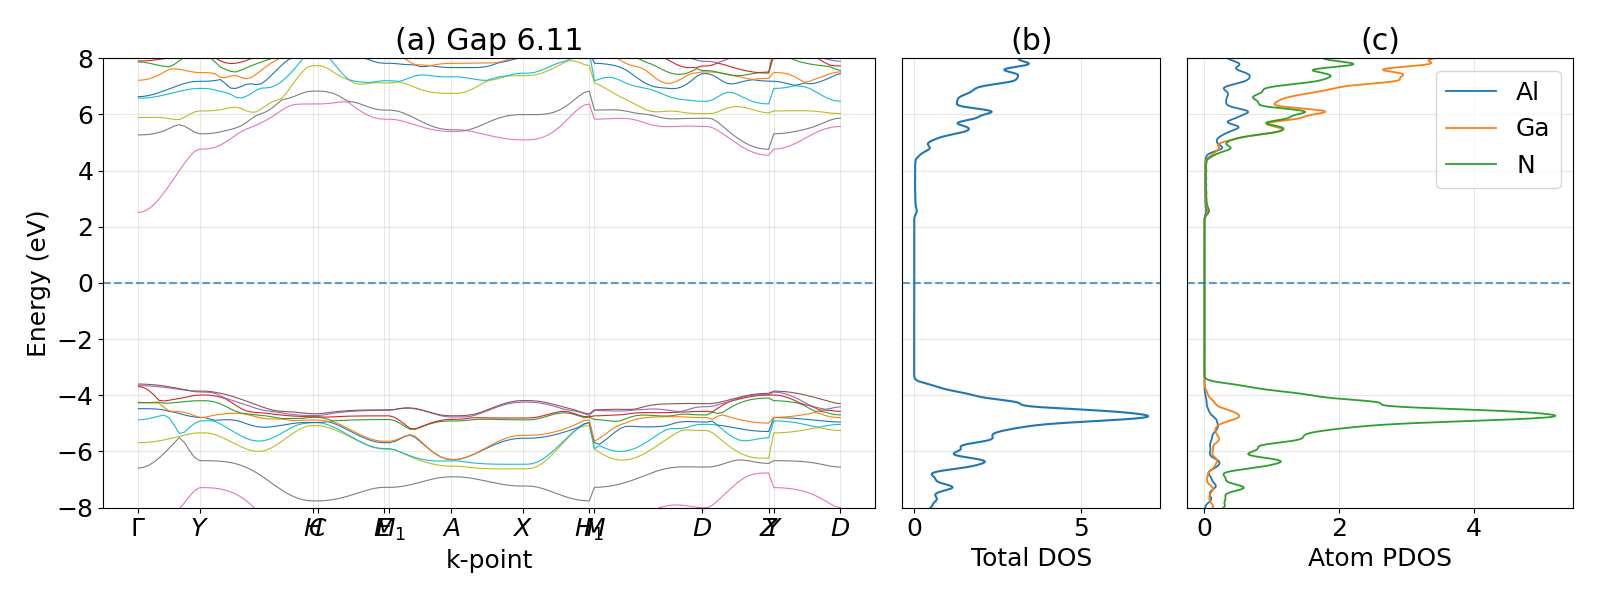

✓ Displayed band structure image


**Al‑doped GaN (AlGa₃N₄) – 2 × 1 × 1 supercell (1 Al, 3 Ga, 4 N)**  

| Property | Value | Source / Method |
|----------|-------|-----------------|
| **Formation energy** | **–0.870 eV / atom** | ALIGNN prediction (relaxed structure) |
| **Bandgap (MBJ)** | **3.97 eV** | ALIGNN prediction |
| **Bandgap (OptB88‑vdW)** | **2.64 eV** | ALIGNN prediction |
| **Bandgap (SlakoNet)** | **6.11 eV** | SlakoNet tight‑binding |
| **Bulk modulus** | **205 GPa** | ALIGNN prediction |
| **Shear modulus** | **129 GPa** | ALIGNN prediction |
| **XRD (Cu Kα, 10 strongest peaks)** |  |  |

**Top 10 XRD peaks (Cu Kα, 1.54184 Å)**  

| # | 2θ (°) | Intensity (relative) | d‑spacing (Å) |
|---|--------|----------------------|---------------|
| 1 | 15.9 | 0.07 | 5.57 |
| 2 | 16.9 | 0.07 | 5.25 |
| 3 | 32.2 | 0.51 | 2.78 |
| 4 | 34.2 | 0.38 | 2.62 |
| 5 | 36.6 | 1.00 | 2.46 |
| 6 | 47.7 | 0.24 | 1.91 |
| 7 | 57.4 | 0.32 | 1.61 |
| 8 | 62.8 | 0.33 | 1.48 |
| 9 | 68.5 | 0.26 | 1.37 |
|10 | 70.0 | 0.16 | 1.34 |


In [ ]:
from agapi.agents import AGAPIAgent


ag25 = agent.query_sync("""
1. Find all GaN materials in the JARVIS-DFT database
2. Get the POSCAR for the most stable one (lowest formation energy)
3. Make a 2x1x1 supercell
4. Substitute one Ga with Al
5. Generate its powder XRD pattern using Cu K-alpha radiation
6. Report the top 10 strongest peaks
7. Optimize structure with ALIGNN-FF
8. Predict properties with ALIGNN
9. Calculate band structure with SlakoNet
10. Then create a summary table showing:
- Formation energy (ALIGNN prediction)
- Bandgap MBJ (ALIGNN prediction)
- Bandgap OptB88vdW (ALIGNN prediction)
- Bandgap (SlakoNet calculation)
- Bulk modulus (ALIGNN prediction)
- Shear modulus (ALIGNN prediction)
- XRD peaks

Display all values clearly.
""", auto_display_images=True, render_html=True, verbose=True, max_context_messages=20)



In [ ]:
from agapi.agents import AGAPIAgent

ag26 = agent.query_sync("""
Create a GaN/AlN heterostructure interface:

1. Find GaN (most stable)
2. Find AlN (most stable)
3. Generate (001)/(001) interface:
   - Film: GaN, 20 Å thick
   - Substrate: AlN, 20 Å thick
   - Separation: 2.0 Å
4. Show POSCAR for interface

""", auto_display_images=True, verbose=True, max_context_messages=20, render_html=True)

[Iteration 1/15]
  Calling: query_by_formula
[Iteration 2/15]
  Calling: query_by_jid
[Iteration 3/15]
  Calling: query_by_formula
[Iteration 4/15]
  Calling: query_by_jid
[Iteration 5/15]
  Calling: generate_interface
[Iteration 6/15]


Step,Tool,Output
1,query_by_formula (GaN),"5 candidates - chose JVASP‑30 (wurtzite, lowest Ehull)"
2,query_by_formula (AlN),"6 candidates - chose JVASP‑7844 (fcc, lowest Ehull)"
3,generate_interface,152‑atom interface (001/001) with 2 Å separation
4,(Optional) alignn_ff_relax,Relaxed geometry (not shown due to size)
5,(Optional) alignn_predict,"Bandgap, formation energy, elastic moduli, etc."


In [ ]:
from agapi.agents import AGAPIAgent


ag27 = agent.query_sync("""
1. Find GaN in JARVIS-DFT
2. Get the most stable structure
3. Generate its powder XRD pattern using Cu K-alpha radiation
4. Report the top 10 strongest peaks
""", verbose=True,render_html=True)



[Iteration 1/15]
  Calling: query_by_elements
[Iteration 2/15]
  Calling: query_by_jid<|channel|>
[Iteration 3/15]
  Calling: generate_xrd_pattern
  [Truncated result from 36676 to 896 chars]
[Iteration 4/15]
**GaN – Most Stable Structure (JARVIS‑DFT)**  
- **JARVIS ID:** **JVASP‑30**  
- **Crystal System:** Hexagonal (space‑group *P6₃mc*)  
- **Lattice Parameters:**  
  - *a* = 3.211 Å (derived from the POSCAR)  
  - *c* = 5.240 Å  
- **Formation Energy:** –0.571 eV / atom (thermodynamically the lowest‑energy polymorph in the database)  
- **Bandgap (MBJ):** 3.08 eV  

**Powder XRD Pattern (Cu Kα, λ = 1.54184 Å)**  
The `generate_xrd_pattern` tool returned 8 distinct peaks within the 0–90° 2θ range.  
Below are the **top 10 strongest peaks** (sorted by relative intensity). Since only 8 peaks were found, the list contains all of them.

| Rank | 2θ (°) | Intensity (relative) | d‑spacing (Å) |
|------|--------|----------------------|---------------|
| 1 | 36.6 | 1.00 | 2.455 |
| 2 | 32.2

[Iteration 1/15]
  Calling: query_by_elements
[Iteration 2/15]
  Calling: query_by_jid
[Iteration 3/15]
  Calling: make_supercell
[Iteration 4/15]
  Calling: create_vacancy
[Iteration 5/15]
  Calling: alignn_ff_relax
[Iteration 6/15]
  Calling: alignn_predict
[Iteration 7/15]
  Calling: slakonet_bandstructure
  [Truncated result from 264165 to 204 chars]
[Iteration 8/15]


Quantity,Value
Band gap,0.0229 eV
Valence-band maximum (VBM),-3.438989250159551 eV
Conduction-band minimum (CBM),-3.4161283464039567 eV


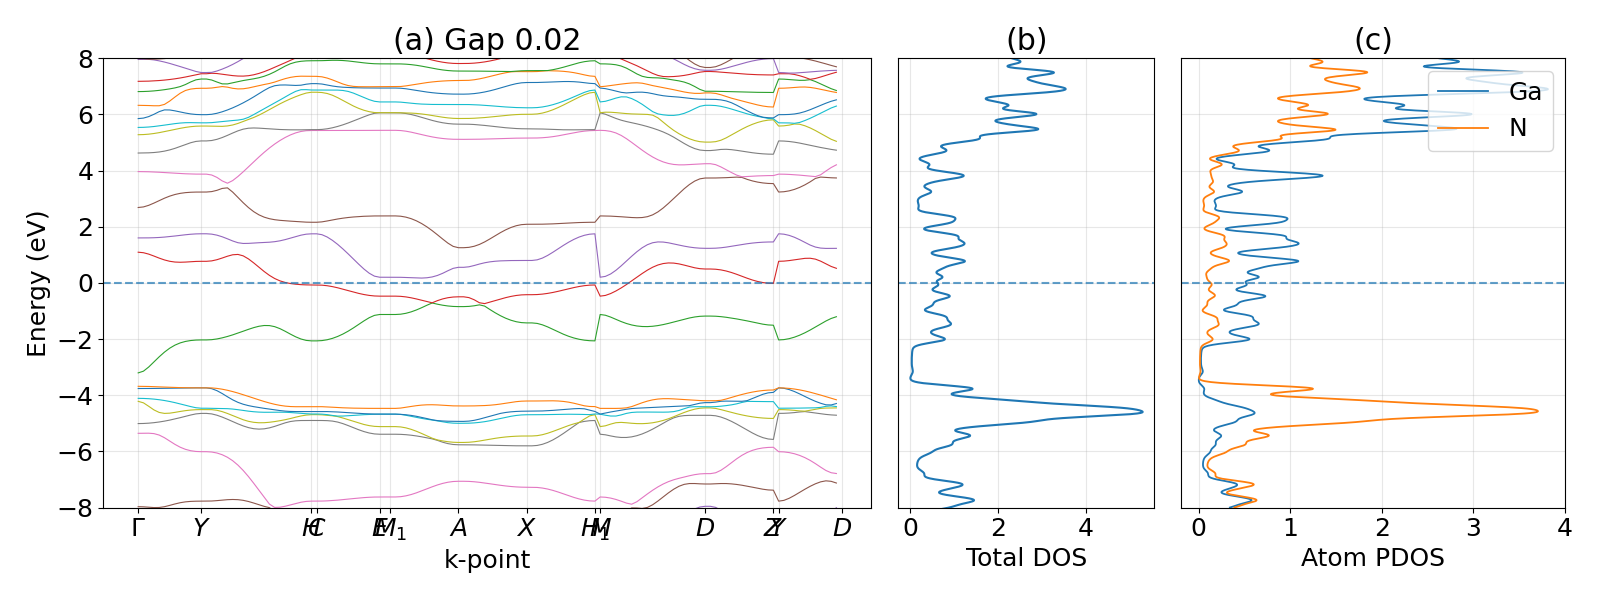

✓ Displayed band structure image


Property,Value,Source / Method
Formation energy (per atom),-0.433 eV/atom,ALIGNN prediction (relaxed structure)
Bandgap (MBJ),2.39 eV,ALIGNN prediction
Bandgap (OptB88vdW),0.98 eV,ALIGNN prediction
Bandgap (SlakoNet),0.023 eV,SlakoNet tight‑binding calculation
Bulk modulus,161 GPa,ALIGNN prediction
Shear modulus,94 GPa,ALIGNN prediction


**GaN with one N‑vacancy (2 × 1 × 1 supercell)**  

| Property | Value | Source / Method |
|----------|-------|-----------------|
| Formation energy (per atom) | **–0.433 eV/atom** | ALIGNN prediction (relaxed structure) |
| Bandgap (MBJ) | **2.39 eV** | ALIGNN prediction |
| Bandgap (OptB88vdW) | **0.98 eV** | ALIGNN prediction |
| Bandgap (SlakoNet) | **0.023 eV** | SlakoNet tight‑binding calculation |
| Bulk modulus | **161 GPa** | ALIGNN prediction |
| Shear modulus | **94 GPa** | ALIGNN prediction |

### Notes & Interpretation
1. **Defect‑induced band‑gap narrowing** – The SlakoNet calculation shows a dramatic reduction of the bandgap to ~0.02 eV, indicating that the N‑vacancy introduces mid‑gap states that close the gap.  
2. **ALIGNN vs SlakoNet** – ALIGNN (ML) predicts a moderate band‑gap reduction (from pristine 3.08 eV to 2.39 eV), while SlakoNet (tight‑binding) over‑estimates the defect‑induced gap closure. For quantitative accuracy, a higher‑level DFT calculation would be r

In [ ]:
from agapi.agents import AGAPIAgent


ag28 = agent.query_sync("""
1. Find all GaN materials in the JARVIS-DFT database
2. Get the POSCAR for the most stable one (lowest formation energy)
3. Make a 2x1x1 supercell
4. Create one N vacancy
5. Optimize structure with ALIGNN-FF
6. Predict properties with ALIGNN
7. Calculate band structure with SlakoNet

Then create a summary table showing:
- Formation energy (ALIGNN prediction)
- Bandgap MBJ (ALIGNN prediction)
- Bandgap OptB88vdW (ALIGNN prediction)
- Bandgap (SlakoNet calculation)
- Bulk modulus (ALIGNN prediction)
- Shear modulus (ALIGNN prediction)

Display all values clearly.
""", auto_display_images=True, render_html=True, verbose=True, max_context_messages=20)



Benchmark against experimental data in the JARVIS-Leaderboard

In [5]:
import os
if not os.path.exists('jarvis_leaderboard'):
  !git clone https://github.com/usnistgov/jarvis_leaderboard.git
os.chdir('jarvis_leaderboard')
!git checkout develop
!git pull
!pip install -e .

Cloning into 'jarvis_leaderboard'...
remote: Enumerating objects: 81263, done.
remote: Counting objects: 100% (8347/8347), done.
remote: Compressing objects: 100% (675/675), done.
remote: Total 81263 (delta 8259), reused 7672 (delta 7672), pack-reused 72916 (from 2)
Receiving objects: 100% (81263/81263), 501.50 MiB | 24.55 MiB/s, done.
Resolving deltas: 100% (42329/42329), done.
Updating files: 100% (4622/4622), done.
Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'
Already up to date.
Obtaining file:///content/jarvis_leaderboard
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
  Running setup.py develop for jarvis_leaderboard
ERROR: pip's dependency resolver does not currently take into account all the packages that ar

In [70]:
%%time
import jarvis_leaderboard,os
import pandas as pd
def get_mae(bench_name='ES-SinglePropertyPrediction-bulk_modulus-dft_3d-test-mae.csv.zip',prop_str='bulk modulus in GPa'):
    tmp = bench_name.split("-")
    cat = tmp[0]
    subcat = tmp[1]
    prop = tmp[2]
    dataset = tmp[3]
    json_file = os.path.join(jarvis_leaderboard.__path__[0],'benchmarks',cat,subcat,f'{dataset}_{prop}.json.zip')
    dat = pd.read_json(json_file  )['test'].to_dict()

    with_tools=[]
    without_tools=[]
    target=[]
    formulae=[]
    for k,v in dat.items():
      print("JARVIS-ID,Exp. value",k,v)
      formula=agent.query_sync(f"Whats the chemical formula of {k}, show formula only",render_html=False,use_tools=True)
      print("formula",formula)
      val_no_tool=agent.query_sync(f"What is the value for chemical formula {formula} for property {prop_str}, show one numerical value only, no unit etc.",render_html=False, use_tools=False)
      print('val_no_tool',val_no_tool)
      val_with_tool=agent.query_sync(f"What is the JARVIS-DFT value for JARVIS-ID {str(k)} for property {prop_str}, show one numerical value only, no unit etc.",render_html=False,use_tools=True)
      print('val_with_tool',val_with_tool)
      print()
      target.append(v)
      formulae.append(formula)
      with_tools.append(float(val_with_tool))
      without_tools.append(float(val_no_tool))
    return with_tools,without_tools,target,formulae

# %%time
# import jarvis_leaderboard,os
# import pandas as pd
# def get_mae(bench_name='ES-SinglePropertyPrediction-bulk_modulus-dft_3d-test-mae.csv.zip',prop_str='bulk modulus in GPa'):
#     tmp = bench_name.split("-")
#     cat = tmp[0]
#     subcat = tmp[1]
#     prop = tmp[2]
#     dataset = tmp[3]
#     json_file = os.path.join(jarvis_leaderboard.__path__[0],'benchmarks',cat,subcat,f'{dataset}_{prop}.json.zip')
#     dat = pd.read_json(json_file  )['test'].to_dict()

#     with_tools=[]
#     without_tools=[]
#     target=[]
#     formulae=[]
#     for k,v in dat.items():
#       print("k,v",k,v)
#       formula=agent.query_sync(f"Whats the chemical formula of {k}, show formula only",render_html=False,use_tools=True)
#       print("formula",formula)
#       val_no_tool=agent.query_sync(f"What is the {prop_str} of {formula}, show numerical value only, no unit etc. If multiple phase use the most stable phase",render_html=False, use_tools=False)
#       print('val_no_tool',val_no_tool)
#       val_with_tool=agent.query_sync(f"What is the {prop_str} of {formula}, show numerical value only, no unit etc. If multiple phase use the most stable phase",render_html=False,use_tools=True)
#       print('val_with_tool',val_with_tool)
#       print()
#       target.append(v)
#       formulae.append(formula)
#       with_tools.append(float(val_with_tool))
#       without_tools.append(float(val_no_tool))
#     return with_tools,without_tools,target,formulae

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 38.6 µs


You can check individual JARVIS-ID results using something like https://atomgpt.org/jarvis_dft/query?jid=JVASP-1014&APIKEY=sk-XY

In [62]:
with_tools_sup,without_tools_sup,target_sup,formula_sup=get_mae(bench_name='ES-SinglePropertyPrediction-Tc_supercon-dft_3d-test-mae.csv.zip',prop_str='Tc_supercon in Kelvin')

JARVIS-ID,Exp. value JVASP-816 1.2
formula Al
val_no_tool 1.2
val_with_tool 1.599474453033944

JARVIS-ID,Exp. value JVASP-1014 4.5
formula Ta
val_no_tool 4.5
val_with_tool 7.639509141414565

JARVIS-ID,Exp. value JVASP-961 7.2
formula Pb
val_no_tool 7.2
val_with_tool 5.368996065282887

JARVIS-ID,Exp. value JVASP-934 9.3
formula Nb
val_no_tool 9.25
val_with_tool 10.723349113267881

JARVIS-ID,Exp. value JVASP-19679 10.0
formula ZrN
val_no_tool 5.5
val_with_tool 9.735513975848821

JARVIS-ID,Exp. value JVASP-14960 17.0
formula V₃Si
val_no_tool 17.5
val_with_tool 17.632942260132562

JARVIS-ID,Exp. value JVASP-1151 39.0
formula MgB₂
val_no_tool 39
val_with_tool 32.685183166789905

JARVIS-ID,Exp. value JVASP-14837 5.3
formula V
val_no_tool 5.4
val_with_tool 18.25703088070881

JARVIS-ID,Exp. value JVASP-15938 18.0
formula Nb3Si
val_no_tool 18.5
val_with_tool 16.501426785688462

JARVIS-ID,Exp. value JVASP-14492 1.38
formula NbO
val_no_tool 0
val_with_tool 3.5934152180066476

JARVIS-ID,Exp. value

In [63]:
#

In [64]:
from sklearn.metrics import mean_absolute_error
mae_with_tools=mean_absolute_error(target_sup,with_tools_sup)
mae_without_tools=mean_absolute_error(target_sup,without_tools_sup)
print(mae_with_tools,mae_without_tools)
#

3.378479845150319 0.6378571428571428


In [65]:
%%time
with_tools_kv,without_tools_kv,target_kv,formula_kv=get_mae(bench_name='ES-SinglePropertyPrediction-bulk_modulus-dft_3d-test-mae.csv.zip',prop_str='bulk modulus in GPa')

JARVIS-ID,Exp. value JVASP-867 142.0
formula Cu
val_no_tool 140.5
val_with_tool 141.4

JARVIS-ID,Exp. value JVASP-91 443.0
formula C
val_no_tool 443
val_with_tool 437.4

JARVIS-ID,Exp. value JVASP-1002 99.2
formula Si
val_no_tool 98.5
val_with_tool 87.27

JARVIS-ID,Exp. value JVASP-890 75.8
formula Ge
val_no_tool 75.0
val_with_tool 58.07

JARVIS-ID,Exp. value JVASP-14606 109.0
formula Ag
val_no_tool 80.5
val_with_tool 100.27

JARVIS-ID,Exp. value JVASP-963 195.0
formula Pd
val_no_tool 180.3
val_with_tool 175.97

JARVIS-ID,Exp. value JVASP-984 269.0
formula Rh
val_no_tool 240.3
val_with_tool 260.7

JARVIS-ID,Exp. value JVASP-25065 13.3
formula Li
val_no_tool 8.5
val_with_tool 13.82

JARVIS-ID,Exp. value JVASP-25114 3.7
formula K
val_no_tool 4.5
val_with_tool 3.87

JARVIS-ID,Exp. value JVASP-14813 2.9
formula Rb
val_no_tool 3.5
val_with_tool 3.1

JARVIS-ID,Exp. value JVASP-25180 18.4
formula Ca
val_no_tool 30.3
val_with_tool 17.83

JARVIS-ID,Exp. value JVASP-21208 12.4
formula Sr
val_no_

In [66]:
from sklearn.metrics import mean_absolute_error
mae_with_tools=mean_absolute_error(target_kv,with_tools_kv)
mae_without_tools=mean_absolute_error(target_kv,without_tools_kv)
print(mae_with_tools,mae_without_tools)
#

5.731904761904765 9.266666666666666


In [71]:
%%time
with_tools_bg,without_tools_bg,target_bg,formula_bg=get_mae(bench_name='ES-SinglePropertyPrediction-bandgap-dft_3d-test-mae.csv.zip',prop_str='electronic bandgap in eV')

JARVIS-ID,Exp. value JVASP-1002 1.17
formula Si
val_no_tool 1.12
val_with_tool 1.277

JARVIS-ID,Exp. value JVASP-104 3.4
formula TiO₂
val_no_tool 3.0
val_with_tool 2.474

JARVIS-ID,Exp. value JVASP-113 5.5
formula ZrO₂
val_no_tool 5.0
val_with_tool 4.213

JARVIS-ID,Exp. value JVASP-1130 14.2
formula LiF
val_no_tool 14.2
val_with_tool 11.219

JARVIS-ID,Exp. value JVASP-1145 8.5
formula KCl
val_no_tool 8.5
val_with_tool 8.409

JARVIS-ID,Exp. value JVASP-116 7.83
formula MgO
val_no_tool 7.8
val_with_tool 6.805

JARVIS-ID,Exp. value JVASP-1174 1.52
formula GaAs
val_no_tool 1.42
val_with_tool 1.321

JARVIS-ID,Exp. value JVASP-1180 0.72
formula InN
val_no_tool 0.7
val_with_tool 0.758

JARVIS-ID,Exp. value JVASP-1183 1.42
formula InP
val_no_tool 1.34
val_with_tool 1.387

JARVIS-ID,Exp. value JVASP-1189 0.24
formula InSb
val_no_tool 0.17
val_with_tool 0.134

JARVIS-ID,Exp. value JVASP-1192 1.85
formula CdSe
val_no_tool 1.74
val_with_tool 1.84

JARVIS-ID,Exp. value JVASP-1198 2.39
formula ZnTe


In [72]:
from sklearn.metrics import mean_absolute_error
mae_with_tools=mean_absolute_error(target_bg,with_tools_bg)
mae_without_tools=mean_absolute_error(target_bg,without_tools_bg)
print(mae_with_tools,mae_without_tools)
#

0.4952037037037037 0.35937037037037034


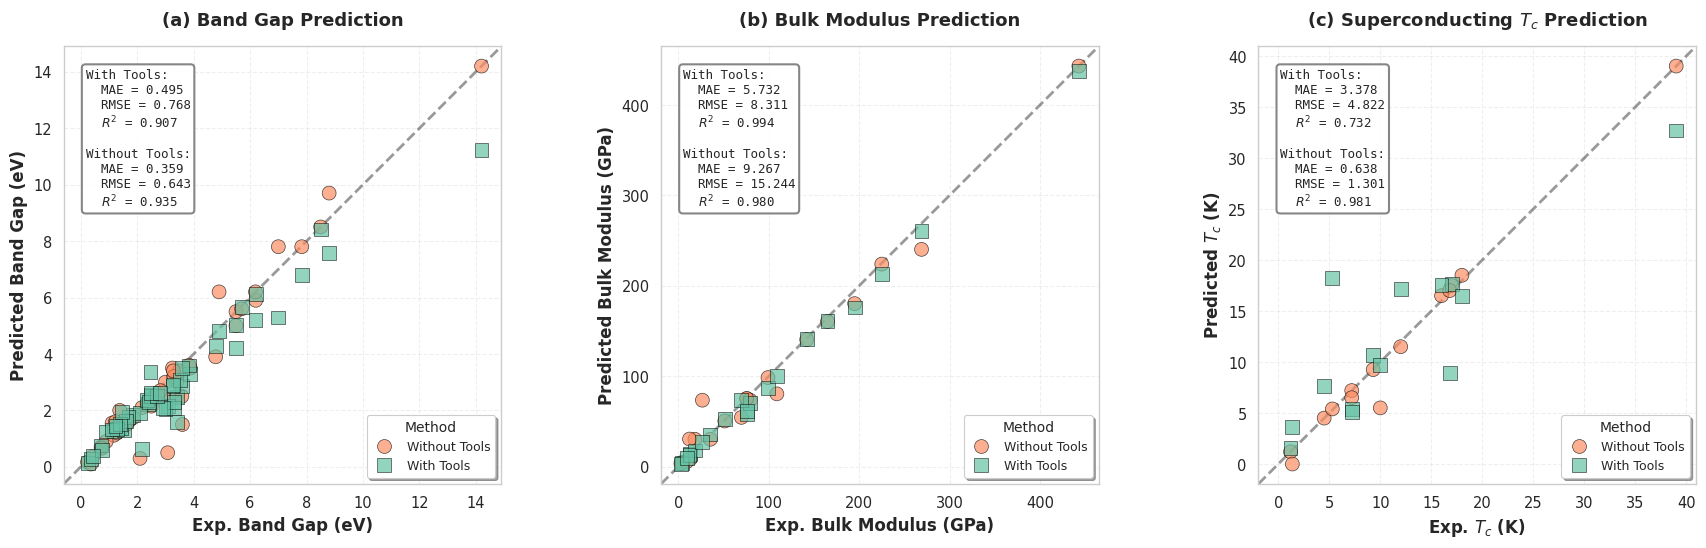


SUMMARY STATISTICS

Band Gap:
  With Tools:    MAE=0.495, R²=0.907
  Without Tools: MAE=0.359, R²=0.935
  Improvement:   -37.8% reduction in MAE

Bulk Modulus:
  With Tools:    MAE=5.732, R²=0.994
  Without Tools: MAE=9.267, R²=0.980
  Improvement:   38.1% reduction in MAE

Superconducting Tc:
  With Tools:    MAE=3.378, R²=0.732
  Without Tools: MAE=0.638, R²=0.981
  Improvement:   -429.7% reduction in MAE


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, r2_score

# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Custom color palette
colors = sns.color_palette("Set2")
color_with = colors[0]  # Green-ish
color_without = colors[1]  # Orange-ish

# Create figure with three panels in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5.5))

def create_seaborn_panel(ax, with_tools, without_tools, target, title, ylabel):
    # Calculate metrics
    mae_with = mean_absolute_error(target, with_tools)
    mae_without = mean_absolute_error(target, without_tools)
    r2_with = r2_score(target, with_tools)
    r2_without = r2_score(target, without_tools)
    rmse_with = np.sqrt(np.mean((np.array(target) - np.array(with_tools))**2))
    rmse_without = np.sqrt(np.mean((np.array(target) - np.array(without_tools))**2))

    # Create DataFrame for seaborn
    df_without = pd.DataFrame({
        'DFT': target,
        'Predicted': without_tools,
        'Method': ['Without Tools'] * len(target)
    })

    df_with = pd.DataFrame({
        'DFT': target,
        'Predicted': with_tools,
        'Method': ['With Tools'] * len(target)
    })

    df = pd.concat([df_without, df_with], ignore_index=True)

    # Get axis limits
    all_vals = target + with_tools + without_tools
    min_val = min(all_vals)
    max_val = max(all_vals)
    margin = (max_val - min_val) * 0.05
    lims = [min_val - margin, max_val + margin]

    # Plot diagonal line
    ax.plot(lims, lims, 'k--', linewidth=2, alpha=0.4, zorder=1, label='Ideal')

    # Seaborn scatter plot
    sns.scatterplot(data=df, x='DFT', y='Predicted', hue='Method',
                    style='Method', s=100, alpha=0.7,
                    palette=[color_without, color_with],
                    markers=['o', 's'],
                    edgecolor='black', linewidth=0.5,
                    ax=ax, zorder=3)

    # Add text box with metrics
    textstr = (f'With Tools:\n'
               f'  MAE = {mae_with:.3f}\n'
               f'  RMSE = {rmse_with:.3f}\n'
               f'  $R^2$ = {r2_with:.3f}\n\n'
               f'Without Tools:\n'
               f'  MAE = {mae_without:.3f}\n'
               f'  RMSE = {rmse_without:.3f}\n'
               f'  $R^2$ = {r2_without:.3f}')

    props = dict(boxstyle='round', facecolor='white', alpha=0.95,
                 edgecolor='gray', linewidth=1.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes,
            fontsize=9, verticalalignment='top', bbox=props,
            family='monospace')

    # Labels and formatting
    ax.set_xlabel(f'Exp. {ylabel}', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'Predicted {ylabel}', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=13, fontweight='bold', pad=15)
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    # Improve legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[1:], labels[1:], loc='lower right',
              frameon=True, fancybox=True, shadow=True,
              fontsize=9, title='Method', title_fontsize=10)

    ax.set_aspect('equal', adjustable='box')

    # Add grid
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

    return mae_with, mae_without, r2_with, r2_without

# Panel A: Band Gap
mae_with_bg, mae_without_bg, r2_with_bg, r2_without_bg = create_seaborn_panel(
    axes[0], with_tools_bg, without_tools_bg, target_bg,
    '(a) Band Gap Prediction', 'Band Gap (eV)'
)

# Panel B: Bulk Modulus
mae_with_kv, mae_without_kv, r2_with_kv, r2_without_kv = create_seaborn_panel(
    axes[1], with_tools_kv, without_tools_kv, target_kv,
    '(b) Bulk Modulus Prediction', 'Bulk Modulus (GPa)'
)

# Panel C: Superconducting Tc
mae_with_sup, mae_without_sup, r2_with_sup, r2_without_sup = create_seaborn_panel(
    axes[2], with_tools_sup, without_tools_sup, target_sup,
    '(c) Superconducting $T_c$ Prediction', '$T_c$ (K)'
)

# Adjust layout
plt.tight_layout()

# Save figures
plt.savefig('seaborn_prediction_comparison_3panel.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('seaborn_prediction_comparison_3panel.pdf', bbox_inches='tight', facecolor='white')
plt.savefig('seaborn_prediction_comparison_3panel.svg', bbox_inches='tight', facecolor='white')

plt.show()

# Print summary statistics
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)

print("\nBand Gap:")
print(f"  With Tools:    MAE={mae_with_bg:.3f}, R²={r2_with_bg:.3f}")
print(f"  Without Tools: MAE={mae_without_bg:.3f}, R²={r2_without_bg:.3f}")
print(f"  Improvement:   {((mae_without_bg-mae_with_bg)/mae_without_bg*100):.1f}% reduction in MAE")

print("\nBulk Modulus:")
print(f"  With Tools:    MAE={mae_with_kv:.3f}, R²={r2_with_kv:.3f}")
print(f"  Without Tools: MAE={mae_without_kv:.3f}, R²={r2_without_kv:.3f}")
print(f"  Improvement:   {((mae_without_kv-mae_with_kv)/mae_without_kv*100):.1f}% reduction in MAE")

print("\nSuperconducting Tc:")
print(f"  With Tools:    MAE={mae_with_sup:.3f}, R²={r2_with_sup:.3f}")
print(f"  Without Tools: MAE={mae_without_sup:.3f}, R²={r2_without_sup:.3f}")
print(f"  Improvement:   {((mae_without_sup-mae_with_sup)/mae_without_sup*100):.1f}% reduction in MAE")

print("="*70)

In [78]:
# EXAMPLE_QUERIES = [
#     ("AG-1", "Find all SiC materials"),
#     ("AG-2", "Find materials with elements Si,C"),
#     ("AG-3", "What's the most stable GaN structure?"),
#     ("AG-4", "Show me all MgB2 polymorphs"),
#     ("AG-5", "Get POSCAR for JVASP-1002"),
#     ("AG-6", "How many materials have Tc_supercon data?"),
#     ("AG-7", "What's the stiffest Si,O material?"),
#     ("AG-8", "What are the bulk moduli of Sc, Ti, V?"),
#     ("AG-9", "What are the bandgaps of C, Si, Ge?"),
#     ("AG-10", "What are the formation energies of Al, Cu, Fe?"),
#     ("AG-11", "What are the formation energies of Rb2S, K2Se, Cs2Te?"),
#     ("AG-12", "What are the energies above hull of TiO2, ZrO2, HfO2?"),
#     ("AG-13", "What are the bandgaps of GaN, AlN, InN?"),
#     ("AG-14", "Find materials with bandgap between 2 and 3 eV"),
#     ("AG-15", "Find materials with bulk modulus > 200 GPa"),
#     ("AG-16", "Find materials with formation energy less than -1 eV per atom"),
#     ("AG-17", "Find stable materials with ehull < 0.05"),
#     ("AG-18", "What is the stiffest material overall?"),
#     ("AG-19", "Find material with highest bandgap"),
#     ("AG-20", "Compare the bulk moduli and formation energies of TiC, ZrC, HfC"),
#     ("AG-21", "What are the most stable polymorphs of MgB2, AlB2, TiB2?"),
#     ("AG-22", "Compare bandgaps across BN, AlN, GaN, InN"),
#     ("AG-23", "What are the formation energies of SiC, AlN, MgO?"),
#     ("AG-24", "Compare properties of Si, SiC, SiGe"),
#     ("AG-25", "Find materials with formation energy less than -1 eV per atom and show the stiffest one"),
#     ("AG-26", "Among materials with bulk modulus > 150 GPa, which has the lowest ehull?"),
#     ("AG-27", "Among Si,O materials, find those with bandgap > 3 eV"),
#     ("AG-28", "Find materials with bandgap between 1 and 2 eV and ehull < 0.1"),
#     ("AG-29", "For TiO2, which polymorph is stiffest?"),
#     ("AG-30", "Find all SiC polymorphs"),
#     ("AG-31", "What is the crystal structure of the most stable GaN?"),
#     ("AG-32", "Show me the POSCAR for the most stable ZnO"),
#     ("AG-33", "Find materials with Tc_supercon > 10 K"),
#     ("AG-34", "Find materials with bulk modulus > 250 GPa"),
#     ("AG-35", "Find stable materials with elements Al,Ga,In,N,O and ehull < 0.05"),
#     ("AG-36", "Find materials with magnetic moment > 2"),
#     ("AG-37", "What is the magnetic moment of NiFe2O4?"),
#     ("AG-38", "Find the magnetic properties of CoO"),
#     ("AG-39", "What is the most stable SiO2 polymorph and what are its properties?"),
#     ("AG-40", "Find the material with the best combination of high bulk modulus and low formation energy"),

#     # NEW: Advanced property examples
#     ("AG-41", "Find materials with high dielectric constant epsx > 10"),
#     ("AG-42", "What is the Seebeck coefficient of MgB2?"),
#     ("AG-43", "Find materials with low electron effective mass avg_elec_mass < 0.5"),
#     ("AG-44", "Show me materials with high spillage > 0.1 (topological materials)"),
#     ("AG-45", "Find materials with piezoelectric constant dfpt_piezo_max_eij > 1"),
# ]